<a href="https://colab.research.google.com/github/luuchung/Solar-phovoltaic-faults-classification/blob/master/evn_studentMDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a custom environment
* States: Facebook, Class 1, Class 2, Class 3, Sleep
* Actions: Possible actions are dependent on the current state
* Transition probability: Deterministic transition according to selected action
* Reward: Shown in the figure
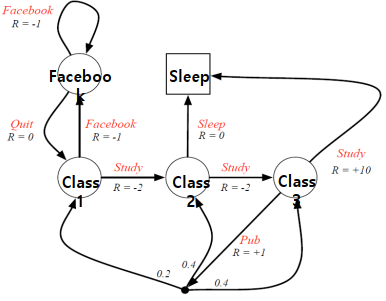

In [1]:
import random
class StudentMDP:
    def __init__(self):
        self.state = 'Class1'
        self.next_state = ''
        self.reward = 0
        self.done = False
        self.action_list = {'Facebook': ['Facebook', 'Quit'],
                            'Class1': ['Facebook', 'Study'],
                            'Class2': ['Sleep', 'Study'],
                            'Class3': ['Study', 'Pub'],
                            'Sleep': ['Sleep']
                            }
        # Transition maxtrix: size nS x nA
        self.action_space = ['Facebook', 'Quit', 'Study', 'Sleep', 'Pub']
        self.state_space = ['Facebook', 'Class1', 'Class2', 'Class3', 'Sleep']
        self.transition= {s: {a: [] for _, a in enumerate(self.action_space)} for _, s in
                                  enumerate(self.state_space)}
        # State transition and reward
        # transition['current state']['action'] = ['next_state', reward]

        self.transition['Facebook']['Facebook'] = ['Facebook', -1]
        self.transition['Facebook']['Quit'] = ['Class1', 0]

        self.transition['Class1']['Facebook'] = ['Facebook', -1]
        self.transition['Class1']['Study'] = ['Class2', -2]

        self.transition['Class2']['Study'] = ['Class3', -2]
        self.transition['Class2']['Sleep'] = ['Sleep', 0]

        self.transition['Class3']['Pub'] = [random.choices(['Class1', 'Class2', 'Class3'], weights = [2, 4, 4], k=1)[0], 1]
        self.transition['Class3']['Study'] = ['Sleep', 10]

    def step(self, action):
        self.next_state, self.reward = self.transition[self.state][action]
        self.state = self.next_state  # Update current_state
        if self.state == 'Sleep':
            self.done = True
        return self.next_state, self.reward, self.done


Check the environment

In [2]:
import numpy as np

env = StudentMDP()

gamma = 1
reward_history = []
state_history = [env.state]
t = 0

while not env.done:
    print('Current state: '+ env.state)
    action = input('Select one of possible actions ('+ ' or '.join(env.action_list[env.state]) + '): ')
    while action not in env.action_list[env.state]:
        action = input('Select one of possible actions (' + ' or '.join(env.action_list[env.state]) + '): ')

    nxt_state, reward, done = env.step(action)
    t+=1
    reward_history.append(reward)
    state_history.append(nxt_state)
    print('Transitions: '+' -> '.join(state_history))
    print('Reward: %s\n'%(reward))

print('Episode is finished')

G_tmp = np.array(reward_history)*(gamma**np.arange(t))
G = np.cumsum(G_tmp[::-1])   # returns

print('Return of each time step')
for i in range(t):
    print('G_%d: %.2f'%(i, G[t-i-1]) )

Current state: Class1
Select one of possible actions (Facebook or Study): Facebook
Transitions: Class1 -> Facebook
Reward: -1

Current state: Facebook
Select one of possible actions (Facebook or Quit): Quit
Transitions: Class1 -> Facebook -> Class1
Reward: 0

Current state: Class1
Select one of possible actions (Facebook or Study): Study
Transitions: Class1 -> Facebook -> Class1 -> Class2
Reward: -2

Current state: Class2
Select one of possible actions (Sleep or Study): Study
Transitions: Class1 -> Facebook -> Class1 -> Class2 -> Class3
Reward: -2

Current state: Class3
Select one of possible actions (Study or Pub): Pub
Transitions: Class1 -> Facebook -> Class1 -> Class2 -> Class3 -> Class2
Reward: 1

Current state: Class2
Select one of possible actions (Sleep or Study): Sleep
Transitions: Class1 -> Facebook -> Class1 -> Class2 -> Class3 -> Class2 -> Sleep
Reward: 0

Episode is finished
Return of each time step
G_0: -4.00
G_1: -3.00
G_2: -3.00
G_3: -1.00
G_4: 1.00
G_5: 0.00
